# LASA

## Init

In [1]:
%matplotlib ipympl
import pyLasaDataset as lasa
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from scipy import signal

Using LASA DataSet from /home/kir0ul/Projects/GP-HSMM/.direnv/python-3.11/lib64/python3.11/site-packages/pyLasaDataset/resources/LASAHandwritingDataset/DataSet


## Data exploration

In [2]:
# DataSet object has all the LASA handwriting data files 
# as attributes, eg:
angle_data = lasa.DataSet.Angle
sine_data = lasa.DataSet.Sine
angle_data, sine_data

({'dt': np.float64(0.002968502735264841), 'demos': [<pyLasaDataset.dataset._Demo object at 0x7fa476ee55d0>, <pyLasaDataset.dataset._Demo object at 0x7fa476ee5190>, <pyLasaDataset.dataset._Demo object at 0x7fa476b9be50>, <pyLasaDataset.dataset._Demo object at 0x7fa476b9bdd0>, <pyLasaDataset.dataset._Demo object at 0x7fa476bbd1d0>, <pyLasaDataset.dataset._Demo object at 0x7fa476bbd050>, <pyLasaDataset.dataset._Demo object at 0x7fa476ee5150>]},
 {'dt': np.float64(0.005768861400492263), 'demos': [<pyLasaDataset.dataset._Demo object at 0x7fa476b9bf10>, <pyLasaDataset.dataset._Demo object at 0x7fa476e63ed0>, <pyLasaDataset.dataset._Demo object at 0x7fa476ee5550>, <pyLasaDataset.dataset._Demo object at 0x7fa476bbdd50>, <pyLasaDataset.dataset._Demo object at 0x7fa476bbddd0>, <pyLasaDataset.dataset._Demo object at 0x7fa476bbdc90>, <pyLasaDataset.dataset._Demo object at 0x7fa476bbded0>]})

In [3]:
# Each Data object has attributes dt and demos (For documentation, 
# refer original dataset repo: 
# https://bitbucket.org/khansari/lasahandwritingdataset/src/master/Readme.txt)
dt = angle_data.dt
demos = angle_data.demos # list of 7 Demo objects, each corresponding to a 
                         # repetition of the pattern
dt, demos

(np.float64(0.002968502735264841),
  <pyLasaDataset.dataset._Demo at 0x7fa476ee5150>])

In [4]:
# Each Demo object in demos list will have attributes pos, t, vel, acc 
# corresponding to the original .mat format described in 
# https://bitbucket.org/khansari/lasahandwritingdataset/src/master/Readme.txt
demo_0 = demos[0]
pos = demo_0.pos # np.ndarray, shape: (2,2000)
vel = demo_0.vel # np.ndarray, shape: (2,2000) 
acc = demo_0.acc # np.ndarray, shape: (2,2000)
t = demo_0.t # np.ndarray, shape: (1,2000)

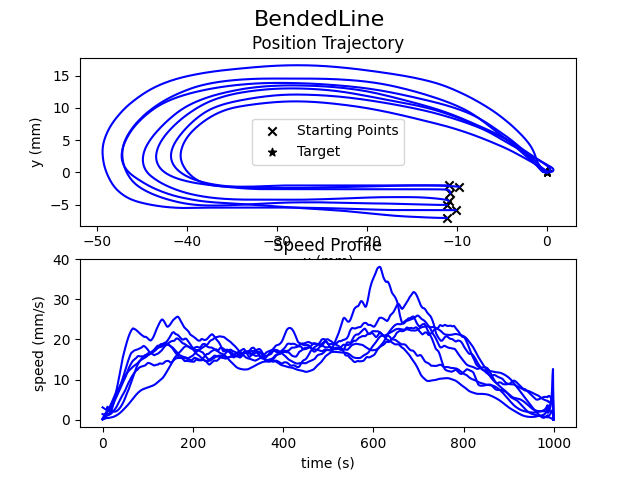

In [5]:
# To visualise the data (2D position and velocity) use the plot_model utility
lasa.utilities.plot_model(lasa.DataSet.BendedLine) # give any of the available 
                                                   # pattern data as argument

In [6]:
len(lasa.DataSet.BendedLine.demos)

7

In [7]:
bl = lasa.DataSet.BendedLine.demos[0]
bl

In [8]:
bl.acc.shape, bl.pos.shape, bl.t.shape, bl.vel.shape, bl.dt.shape

((2, 1000), (2, 1000), (1, 1000), (2, 1000), (1, 1))

In [9]:
# Downsampling timseries
downsampling_factor = 10
time = signal.decimate(bl.t, q=downsampling_factor)
pos = signal.decimate(bl.pos, q=downsampling_factor)
time.shape, pos.shape

((1, 100), (2, 100))

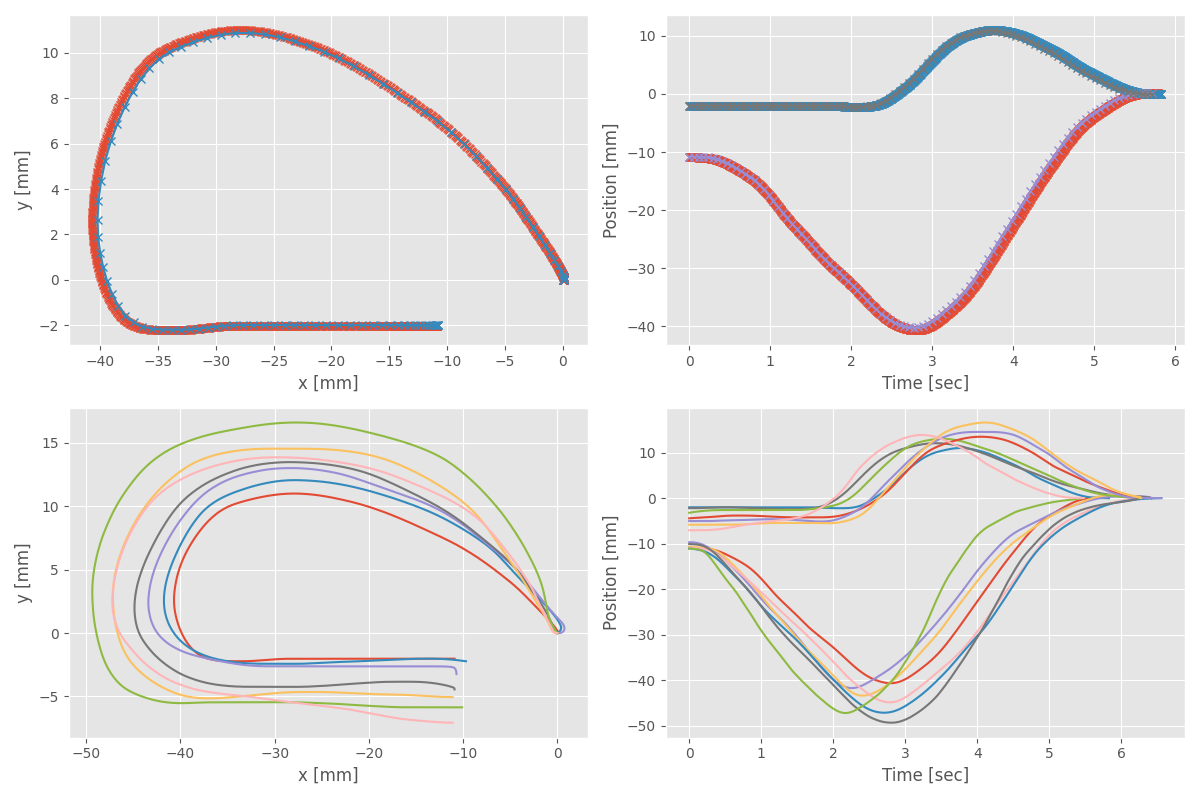

In [10]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    bl = lasa.DataSet.BendedLine.demos[0]
    ax[0, 1].plot(bl.t[0, :], bl.pos[0], marker="x")
    ax[0, 1].plot(bl.t[0, :], bl.pos[1], marker="x")
    ax[0, 1].set_xlabel("Time [sec]")
    ax[0, 1].set_ylabel("Position [mm]")
    ax[0, 1].plot(time.T[:, 0], pos[0], marker="x")
    ax[0, 1].plot(time.T[:, 0], pos[1], marker="x")

    ax[0, 0].plot(bl.pos[0], bl.pos[1], marker="x")
    ax[0, 0].set_xlabel("x [mm]")
    ax[0, 0].set_ylabel("y [mm]")
    ax[0, 0].plot(pos[0], pos[1], marker="x")

    for bl in lasa.DataSet.BendedLine.demos:
        ax[1, 1].plot(bl.t[0, :], bl.pos[0])
        ax[1, 1].plot(bl.t[0, :], bl.pos[1])
        ax[1, 1].set_xlabel("Time [sec]")
        ax[1, 1].set_ylabel("Position [mm]")
         
        ax[1, 0].plot(bl.pos[0], bl.pos[1])
        ax[1, 0].set_xlabel("x [mm]")
        ax[1, 0].set_ylabel("y [mm]")
    
    fig.tight_layout()
    plt.show()

## Extract frequency

In [11]:
bl.t.shape

(1, 1000)

In [12]:
dt = np.mean(np.diff(bl.t))
dt

np.float64(0.00548290878525381)

In [13]:
freq = np.round(1/dt)
freq

np.float64(182.0)

In [14]:
dt = np.mean(np.diff(time))
dt

np.float64(0.05773049269453863)

In [15]:
freq = np.round(1/dt)
freq

np.float64(17.0)

## Export timeseries to plain text files

In [16]:
cwd = Path(".")
cwd.absolute()

PosixPath('/home/kir0ul/Projects/GP-HSMM')

In [17]:
datapath = cwd / "data" / "LASADataset"
datapath

PosixPath('data/LASADataset')

In [18]:
for idx, demo in enumerate(lasa.DataSet.BendedLine.demos):
    # np.savetxt(f"BendedLine_positions_{idx}.txt", demo.pos.T)
    np.savetxt(datapath.joinpath(f"BendedLine_positions_{idx}.txt"), signal.decimate(demo.pos, q=downsampling_factor).T)

## Concatenate several demonstrations

In [28]:
for idx, demo in enumerate(lasa.DataSet.BendedLine.demos[0:3]):
    pos = signal.decimate(demo.pos, q=downsampling_factor)  # Downsampling
    time = signal.decimate(demo.t, q=downsampling_factor)  # Downsampling
    if idx == 0:
        pos_concat1 = pos
        t_concat1 = time
    else:
        pos_concat1 = np.concat((pos_concat1, pos), axis=1)
        dt = np.mean(np.diff(time))
        t_concat1 = np.concat((t_concat1, time + t_concat1[0, -1] + dt), axis=1)
pos_concat1.shape, t_concat1.shape

((2, 300), (1, 300))

In [30]:
for idx, demo in enumerate(lasa.DataSet.BendedLine.demos[3:6]):
    pos = signal.decimate(demo.pos, q=downsampling_factor)  # Downsampling
    time = signal.decimate(demo.t, q=downsampling_factor)  # Downsampling
    if idx == 0:
        pos_concat2 = pos
        t_concat2 = time
    else:
        pos_concat2 = np.concat((pos_concat2, pos), axis=1)
        dt = np.mean(np.diff(time))
        t_concat2 = np.concat((t_concat2, time + t_concat2[0, -1] + dt), axis=1)
pos_concat2.shape, t_concat2.shape

((2, 300), (1, 300))

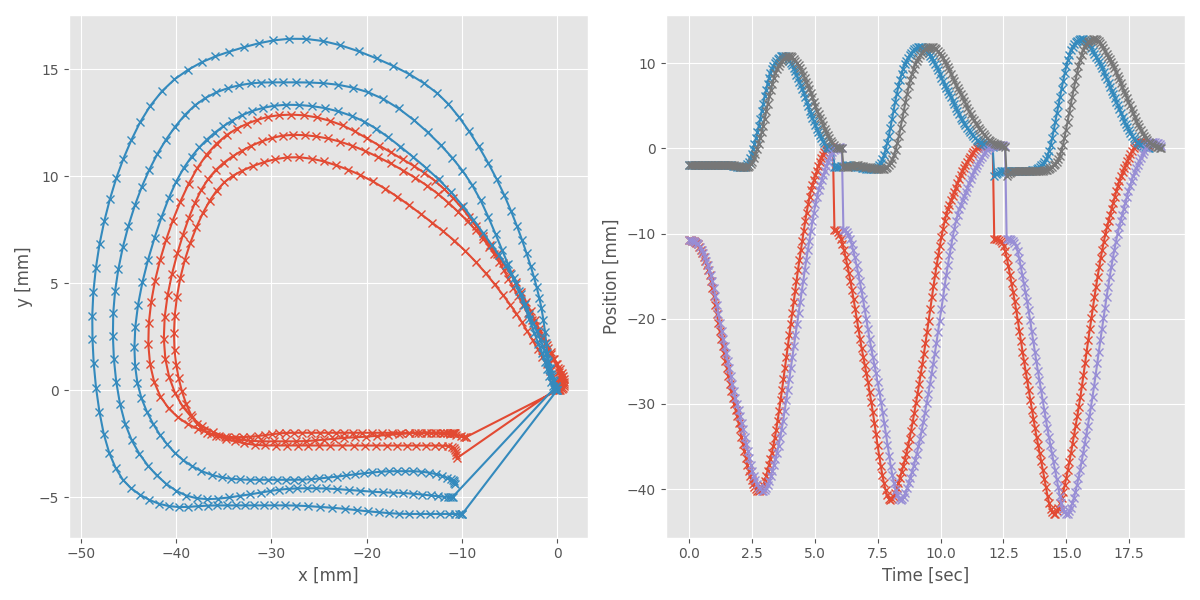

In [35]:
with plt.style.context("ggplot"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(pos_concat1[0], pos_concat1[1], marker="x")
    ax[0].plot(pos_concat2[0], pos_concat2[1], marker="x")
    ax[0].set_xlabel("x [mm]")
    ax[0].set_ylabel("y [mm]")
    
    ax[1].plot(t_concat1.squeeze(), pos_concat1[0], marker="x")
    ax[1].plot(t_concat1.squeeze(), pos_concat1[1], marker="x")
    ax[1].plot(t_concat2.squeeze(), pos_concat1[0], marker="x")
    ax[1].plot(t_concat2.squeeze(), pos_concat1[1], marker="x")
    ax[1].set_xlabel("Time [sec]")
    ax[1].set_ylabel("Position [mm]")
    
    fig.tight_layout()
    plt.show()

In [32]:
dt = np.mean(np.diff(t_concat1))
dt

np.float64(0.061220730725549136)

In [33]:
freq = np.round(1/dt)
freq

np.float64(16.0)

In [34]:
for idx in range(1,3):
    pos = eval(f"pos_concat{idx}")
    np.savetxt(datapath.joinpath(f"BendedLine_positions_concat_{idx}.txt"), pos.T)